**** CREDITS: ****

https://www.youtube.com/watch?v=eaa-7HLcAnQ
    
https://www.kaggle.com/gcdatkin/concrete-crack-image-detection

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pathlib import Path
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [37]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3248054646267363976
]


[]

In [38]:
positive_dir = Path('/home/pratham/study/input_data/kaggle_surface_crack_detection/Positive/')
negative_dir = Path('/home/pratham/study/input_data/kaggle_surface_crack_detection/Negative/')

# Creating DataFrames

In [39]:
import os.path

In [5]:
#list(map(lambda x : os.path.split(x)[0], list(positive_dir.glob(r'*.jpg')))) => File Path
#list(map(lambda x : os.path.split(x)[1], list(positive_dir.glob(r'*.jpg')))) => File names 
#list(map(lambda x : os.path.split(x), list(positive_dir.glob(r'*.jpg')))) => File Path , File names 
#list(positive_dir.glob(r'*.jpg'))

In [42]:
def generate_df(image_dir, label):
    filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=filepaths.index)
    df = pd.concat([filepaths, labels], axis=1)
    return df

In [43]:
generate_df(positive_dir, label = 'POSITIVE')

,Filepath,Label
0,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
1,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
2,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
3,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
4,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
...,...,...
19995,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
19996,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
19997,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
19998,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE


In [8]:
generate_df(negative_dir, label = 'NEGATIVE')

,Filepath,Label
0,/home/pratham/study/input_data/kaggle_surface_...,NEGATIVE
1,/home/pratham/study/input_data/kaggle_surface_...,NEGATIVE
2,/home/pratham/study/input_data/kaggle_surface_...,NEGATIVE
3,/home/pratham/study/input_data/kaggle_surface_...,NEGATIVE
4,/home/pratham/study/input_data/kaggle_surface_...,NEGATIVE
...,...,...
19995,/home/pratham/study/input_data/kaggle_surface_...,NEGATIVE
19996,/home/pratham/study/input_data/kaggle_surface_...,NEGATIVE
19997,/home/pratham/study/input_data/kaggle_surface_...,NEGATIVE
19998,/home/pratham/study/input_data/kaggle_surface_...,NEGATIVE


In [45]:
positive_df = generate_df(positive_dir, label = 'POSITIVE')
negative_df = generate_df(negative_dir, label = 'NEGATIVE')

# SHUFFLING 
all_df = pd.concat([positive_df, negative_df], axis=0).sample(frac=1.0, random_state=1).reset_index(drop = True)
all_df

,Filepath,Label
0,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
1,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
2,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
3,/home/pratham/study/input_data/kaggle_surface_...,NEGATIVE
4,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
...,...,...
39995,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
39996,/home/pratham/study/input_data/kaggle_surface_...,NEGATIVE
39997,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE
39998,/home/pratham/study/input_data/kaggle_surface_...,POSITIVE


In [10]:
train_df, test_df = train_test_split(
    all_df.sample(6000, random_state=1),
    train_size = 0.7,
    shuffle=True,
    random_state=1
)

In [11]:
train_df.shape

(4200, 2)

In [12]:
test_df.shape

(1800, 2)

# LOAD Image Data

In [13]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    
)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

In [46]:
train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120,120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle = True,
    seed = 42,
    subset = 'training'
)
val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120,120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle = True,
    seed = 42,
    subset = 'validation'
)
test_data = test_gen.flow_from_dataframe(
    test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120,120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle = False,
    seed=42
)

Found 3360 validated image filenames belonging to 2 classes.
Found 840 validated image filenames belonging to 2 classes.
Found 1800 validated image filenames belonging to 2 classes.


# TRAINING

In [15]:
inputs = tf.keras.Input(shape=(120,120,3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

model = tf.keras.Model(inputs = inputs, outputs = output)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 120, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 118, 118, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33    

In [16]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience = 3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
105/105 [==============================] - 8s 74ms/step - loss: 0.6825 - accuracy: 0.5765 - val_loss: 0.6300 - val_accuracy: 0.7667
Epoch 2/100
105/105 [==============================] - 8s 74ms/step - loss: 0.6098 - accuracy: 0.7108 - val_loss: 0.5963 - val_accuracy: 0.6476
Epoch 3/100
105/105 [==============================] - 8s 74ms/step - loss: 0.5341 - accuracy: 0.7449 - val_loss: 0.4716 - val_accuracy: 0.8524
Epoch 4/100
105/105 [==============================] - 8s 75ms/step - loss: 0.4251 - accuracy: 0.8742 - val_loss: 0.3964 - val_accuracy: 0.8536
Epoch 5/100
105/105 [==============================] - 8s 75ms/step - loss: 0.3555 - accuracy: 0.9068 - val_loss: 0.3511 - val_accuracy: 0.9226
Epoch 6/100
105/105 [==============================] - 8s 74ms/step - loss: 0.2600 - accuracy: 0.9416 - val_loss: 0.2775 - val_accuracy: 0.9393
Epoch 7/100
105/105 [==============================] - 8s 75ms/step - loss: 0.2280 - accuracy: 0.9400 - val_loss: 0.2372 - val_accuracy:

In [71]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 105}

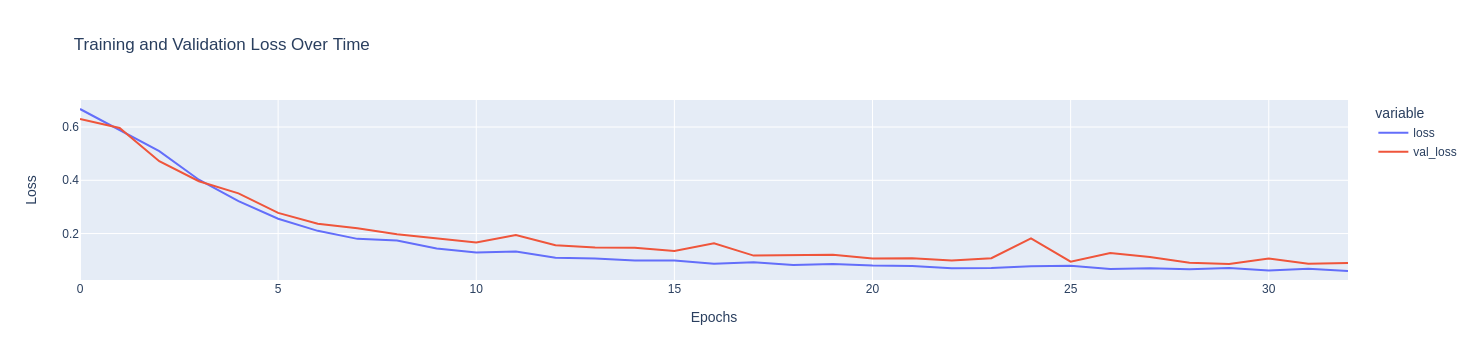

In [70]:
fig_loss = px.line(
    history.history,
    y = ['loss', 'val_loss'],
    labels = {'index': 'Epochs', 'value': 'Loss'},
    title='Training and Validation Loss Over Time'
)

fig_loss.show()

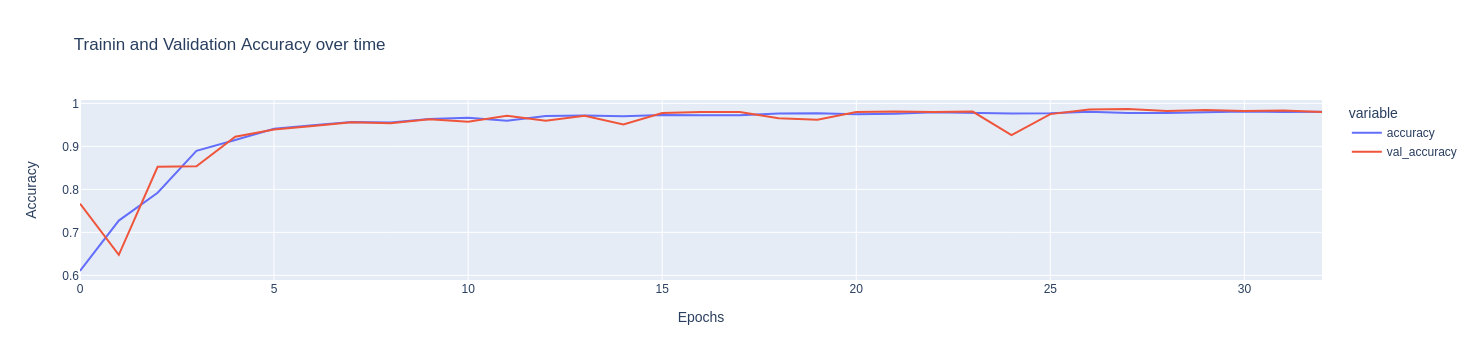

In [18]:
fig_acc = px.line(
    history.history,
    y = ['accuracy', 'val_accuracy'],
    labels = {'index': 'Epochs', 'value': 'Accuracy'},
    title = 'Trainin and Validation Accuracy over time'
)
fig_acc.show()

# Results

In [26]:
np.squeeze(model.predict(test_data) >= 0.5).astype(np.int)

array([0, 0, 1, ..., 0, 1, 1])

In [24]:
test_data.labels[:10]

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

In [ ]:
confusion_matrix()

In [35]:
def evaluate_model(model, test_data):
    results = model.evaluate(test_data, verbose = 0)
    loss = results[0]
    acc = results[1]
    print("Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))
    
    y_pred = np.squeeze(model.predict(test_data) >= 0.5).astype(np.int)
    cm = confusion_matrix(test_data.labels, y_pred)
    clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", 'POSITIVE'])
    
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", 'POSITIVE'])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", 'POSITIVE'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('Classification Report:\n------------------------------ \n', clr)

Test Loss: 0.07218
Test Accuracy: 97.89%


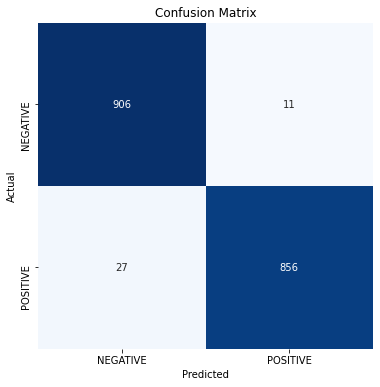

Classification Report:
------------------------------ 
               precision    recall  f1-score   support

    NEGATIVE       0.97      0.99      0.98       917
    POSITIVE       0.99      0.97      0.98       883

    accuracy                           0.98      1800
   macro avg       0.98      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800



In [36]:
evaluate_model(model, test_data)